In [1]:

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
# link dos dados
#http://dados.recife.pe.gov.br/dataset/6399f689-f1a7-453b-b839-413bd665c355/resource/bb20e5ad-84ae-441c-84b0-4829b887a31a/download/relatorio-de-multas-implantadas-em-2017.csv
ds= pd.read_csv('multas2017.csv' , delimiter=';')

In [3]:
#quantidade de infrações
len(ds)

335748

In [91]:
#2 primeiras infrações
ds.head(2)

,datainfracao,horainfracao,dataimplantacao,agenteequipamento,infracao,descricaoinfracao,amparolegal,localcometimento
0,2017-01-01,20:12:24,2017-01-05,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5452,Estacionar o veículo no passeio.,"Art. 181, Inc. VIII","AVENIDA CONSELHEIRO AGUIAR, AO LADO BOMPRECO"
1,2017-01-01,07:38:21,2017-01-25,Código 3 - LOMBADA ELETRÔNICA,7455,Transitar em velocidade superior à máxima perm...,"Art. 218, Inc. I","AV. MARECHAL MASCARENHAS DE MORAES - SEMAFORO,..."


In [97]:
#periodo das infrações
print(ds['datainfracao'].min())
print(ds['datainfracao'].max())

2017-01-01
2017-08-10


In [31]:
ds.columns

Index(['datainfracao', 'horainfracao', 'dataimplantacao', 'agenteequipamento',
       'infracao', 'descricaoinfracao', 'amparolegal', 'localcometimento'],
      dtype='object')

In [98]:
#formas de autoação e quantidades de multas 
autoador = ds['agenteequipamento'].value_counts()

In [99]:
autoador

Código 8 - AUTOS NO TALÃO ELETRÔNICO     172631
Código 3 - LOMBADA ELETRÔNICA             96737
Código 5 - FOTOSENSOR                     37078
Código 7 - ZONA AZUL TALÃO ELETRÔNICO     25200
Código 9 - FAIXA AZUL                      4102
Name: agenteequipamento, dtype: int64

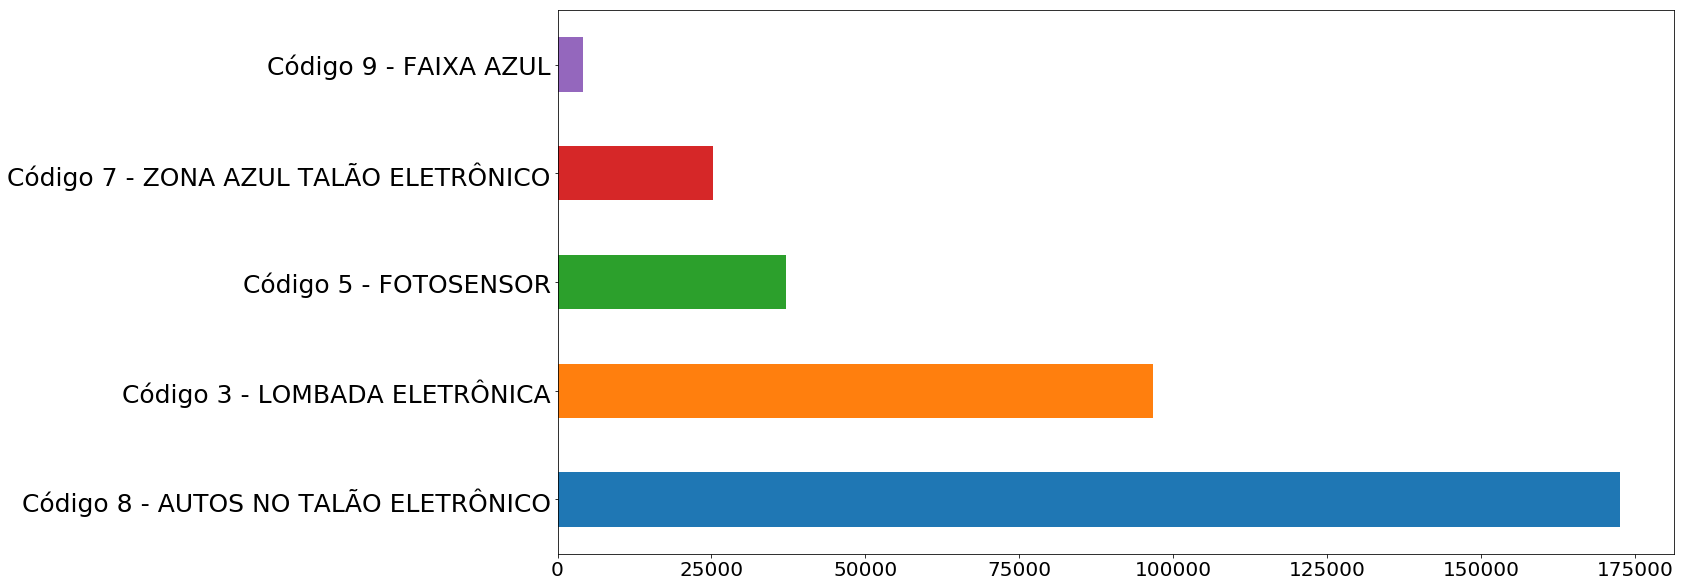

In [181]:
#grafico orgão de autuação
autoador.plot(kind='barh')


In [103]:
#locais com mais infrações mapeadas
locais = ds['localcometimento'].value_counts()

In [104]:
locais.head(10)

RUA REAL DA TORRE, SEMAFORO 237.,  Sentido: AFOGADOS. Faixa: 2                        7792
RUA MADRE DE DEUS, SEMAFORO 020.,  Faixa: 2                                           7107
AV. CDE. DA BOA VISTA, SEMAFORO 486                                                   6433
AV. ENG. ABDIAS DE CARVALHO, SEMAFORO 328.,  Sentido: BR 232. Faixa: 2                5682
AV. MARECHAL MASCARENHAS DE MORAES - SEMAFORO, 530.,  Sentido: AFOGADOS. Faixa: 2     5222
AV. MARECHAL MASCARENHAS DE MORAES - SEMAFORO, 531.,  Sentido: AEROPORTO. Faixa: 4    5053
AV. ENG. ABDIAS DE CARVALHO, SEMAFORO 328.                                            4844
AV. DESEMBARGADOR JOSE NEVES, SEMAFORO 400,  Sentido: SUBURBIO. Faixa: 2              4836
RUA REAL DA TORRE, SEMAFORO 237.                                                      4399
AV. GOV. AGAMENON MAGALHAES, SEMAFORO 069.,  Sentido: OLINDA.                         3997
Name: localcometimento, dtype: int64

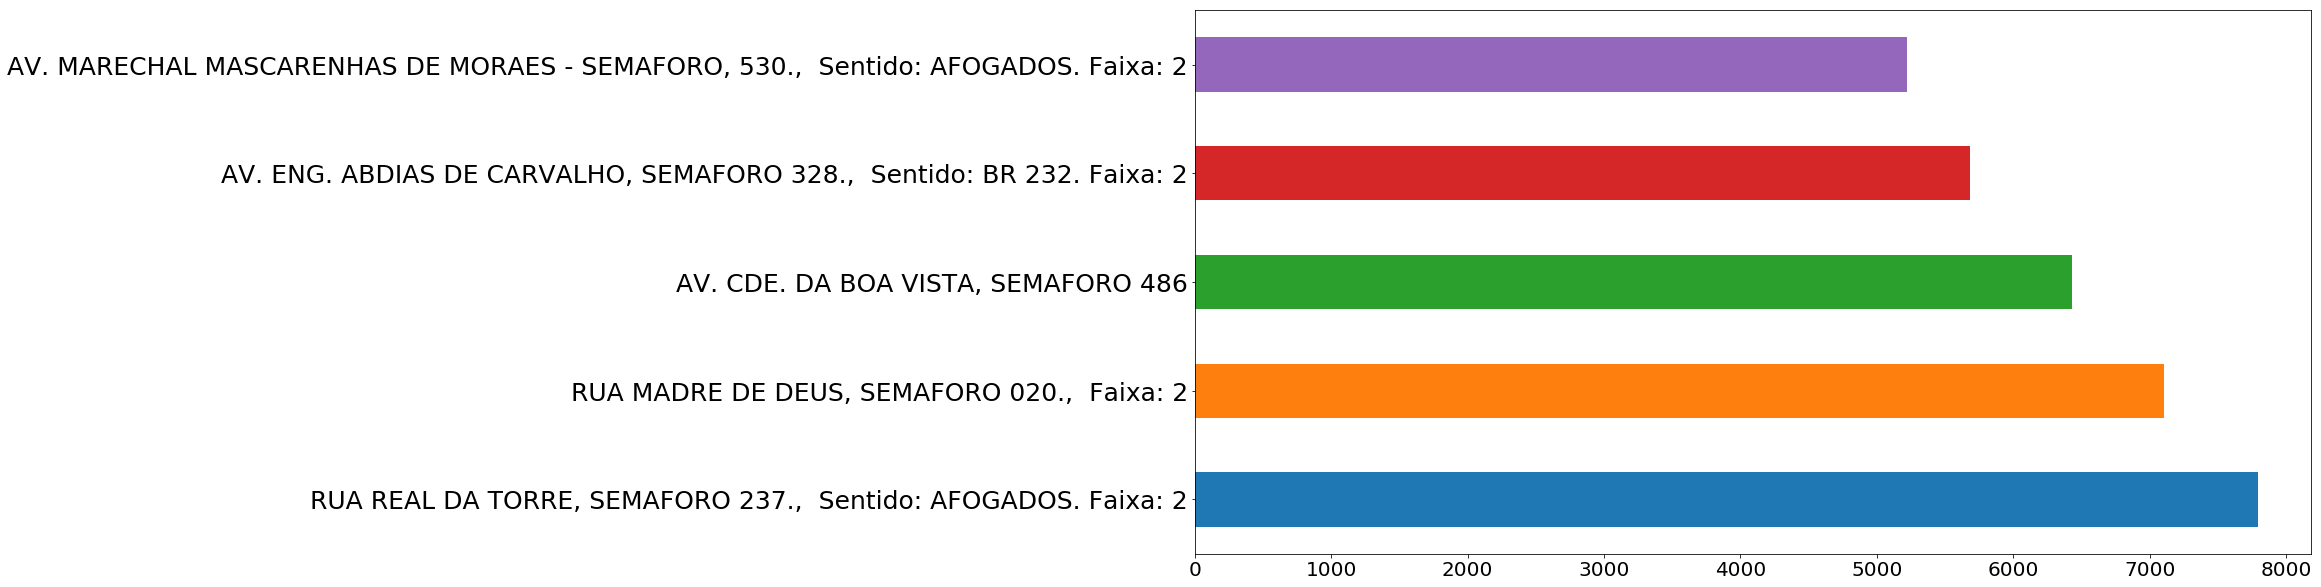

In [186]:
#mapa pricipais locais de autuação
locais.head(5).plot(kind='barh')

In [105]:
#não existe o descritivo da lei, então usaremos a coluna amparo legal para criar uma coluna com os tipos de multas
lei = ds['amparolegal'].value_counts()

In [106]:
lei

Art. 218, Inc. I                                         84814
Art. 181, Inc. XVIII                                     46583
Art. 208                                                 28627
Art. 181, Inc. XVII                                      25155
Art. 252, §único                                         22514
Art. 207                                                 20999
Art. 181, Inc. VIII                                      16609
Art. 187, Inc. I                                         13422
Art. 218, Inc. II                                        11232
Art. 252, Inc. VI                                         7969
Art. 184, Inc. III                                        6939
Art. 181, Inc. XIX                                        6365
Art. 252, Inc. IV                                         5625
Art. 167                                                  4322
Art. 169                                                  4016
Art. 193                                               

In [158]:
#função para criar a coluna com as multas
def multas(s):
    if s =="Art. 218, Inc. I":
        return "vel sup à máx em até 20%"
    
    elif s =="Art. 181, Inc. XVIII":
        return "Estacionar em loc e hor proibidos"
    
    elif s =="Art. 208":
        return "Avan o sinal ver"
    
    elif s =="Art. 181, Inc. XVII":
        return "Estacionar em loc e hor proibidos"
    
    
    elif s =="Art. 169":
        return "dirigir sem atenção aos cuidados"
    
    
    elif s =="Art. 181, Inc. VIII":
        return "Estacionar faxa pedestre "
    
    elif s =="Art. 252, §único":
        return "manuseando telefone celular"
    
    elif s =="Art. 207":
        return "operação de conversão proibida"
    
    elif s =="Art. 181, Inc. XVIII":
        return "Estacionar em loc e hor proibidos"
    
    elif s =="Art. 187, Inc. I":
        return "Transit em loc e hor não permitidos"
    elif s =="Art. 218, Inc. II":
        return "vel sup à máx em mais de 20% e menos de 50%"
    
    elif s =="Art. 252, Inc. VI":
        return "utilizando-se de fones nos ouvidos conectados"
    

    elif s =="Art. 184, Inc. III":
        return "via exclusiva transp publico"
    
    elif s =="Art. 181, Inc. XIX":
        return "estacionar em local proibido"
    
    elif s =="Art. 252, Inc. IV":
        return "calçados inadequados"
    
    elif s =="Art. 167":
        return "dirigir sem atenção aos cuidados"
    
    elif s =="Art. 193":
        return "transitar em calçadas ou ciclo"
    
    elif s =="Art. 186, Inc. II":
        return "transitar na contramão via unica"
    
    elif s =="Art. 182, Inc. VII":
        return "fechar crusamento"
    
    elif s =="Art. 181, Inc. X":
        return "estacionar impedindo outros carros"
    
    elif s =="Art. 181, Inc. I":
        return "estacionar em esquinas"
    
    elif s =="Art. 181, Inc. IX":
        return "estacionar em acostamento"
    
    elif s =="Art. 186, Inc. I":
        return "contramão em via de mao dupla"
    
    elif s =="Art. 244, Inc. I":
        return "conduzir sem capacete"
    
    elif s =="Art. 230, Inc. V":
        return "conduzir sem o licenciamento"
    
    elif s =="ARt. 181, inc. XX":
        return "estacionar em vaga de idoso e def"
    
    elif s =="Art. 183":
        return "parar na faxa de pedestre"
    
    elif s =="Art. 181, Inc. XV":
        return "estacionar em contra mão"
    
    elif s =="Art. 181, Inc. XIII":
        return "estacionar em parada de onibus"
    
    elif s =="Art. 181, Inc. XI":
        return "estacionar em fila dupla"
    
    elif s =="Art. 181, inc. XX":
        return "estacionar em vaga de idoso e def"
    
    elif s =="Art. 197":
        return "mudar de faxa bruscamente para dobrar"
    
    elif s =="Art. 218, Inc. III":
        return "transitar velocidade 50% maior que a via"
    
    elif s =="Art. 244, Inc. II":
        return "transportar passageiro moto incorretamente"
    
    elif s =="Art. 195":
        return "desobedecer agente"
   
    elif s =="Art. 184, Inc. II":
        return "transitar em faixa exclusiva"
    
    elif s =="Art. 206, Inc. IV":
        return "retorno pela contra mão"
    
    elif s =="Art. 182, Inc. VI":
        return "parar na faixa de pedestre"
    
    elif s =="Art. 216":
        return "parar na faixa de pedestre"
    
    return "indefinido"


    

In [159]:
#aplicando a funçÕ MULTAS
ds['multa'] = ds['amparolegal'].apply(multas)

In [160]:
indef =ds[ds['multa']== 'indefinido']

In [161]:
indef['amparolegal'].value_counts()

Art. 206, Inc. III                          335
Art. 181, Inc. IV                           327
Art. 230, Inc. IX                           288
Art. 206, Inc. I                            274
Art.168                                     229
Art. 252, Inc. V                            226
Art. 162, Inc. I                            220
Art. 182, Inc. X                            200
Art. 230, Inc. VI                           200
Art. 227, Inc. II                           200
Art. 196                                    188
Art. 232                                    172
Art. 185, Inc. I                            172
Art. 175                                    168
 SENTIDO UNICO                              144
Art. 184, Inc. I                            135
Art. 170                                    121
Art. 250, Inc. I, alínea a                  111
Art. 214, Inc. I                             98
Art. 252, Inc. I                             97
Art. 230, Inc. XVIII                    

In [162]:
#função com os valores das multas
def multas_val(s):
    
    if s =="Art. 218, Inc. I":
        return  130.16
    elif s =="Art. 182, Inc. VI":
        return 88.38
    
    elif s =="Art. 206, Inc. IV":
        return 293.47
    
    elif s =="Art. 184, Inc. II":
        return 293.47
    
    
    
    elif s =="Art. 195":
        return 195.23
    
    elif s =="Art. 244, Inc. II":
        return 293.47
    
    elif s =="Art. 218, Inc. III":
        return 880.41
    
    
    
    elif s =="Art. 181, Inc. XVIII":
        return  130.16
    
    elif s =="Art. 208":
        return 293.47
    
    elif s =="Art. 181, Inc. XVII":
        return 195.23
    
    elif s =="Art. 252, §único":
        return 293.47
    
    elif s =="Art. 207":
        return  195.23
    
    elif s =="Art. 181, Inc. XVIII":
        return  195.23
    
    elif s =="Art. 187, Inc. I":
        return 130.16
    
    elif s =="Art. 218, Inc. II":
        return 195.23
    
    elif s =="Art. 252, Inc. VI":
        return 130.16
    

    elif s =="Art. 184, Inc. III":
        return   88.38
    
    elif s =="Art. 181, Inc. XIX":
        return 195.23
    
    elif s =="Art. 252, Inc. IV ":
        return  130.16
    
    elif s =="Art. 167":
        return 195.23
    
    elif s =="Art. 169":
        return  88.38
    
    elif s =="Art. 197":
        return 130.16
    
    elif s =="Art. 193":
        return 880.41
    
    elif s =="Art. 186, Inc. II ":
        return 293.47
    
    elif s =="Art. 182, Inc. VII":
        return  130.16
    
    elif s =="Art. 181, Inc. X":
        return 130.16
    
    elif s =="Art. 181, Inc. I":
        return 130.16
    
    elif s =="Art. 181, Inc. IX":
        return  88.38
    
    elif s =="Art. 186, Inc. I":
        return  195.23
    
    elif s =="Art. 244, Inc. I":
        return 293.42
    
    elif s =="Art. 230, Inc. V":
        return  193.47  
    
    elif s =="ARt. 181, inc. XX":
        return  191.54 
    
    elif s =="Art. 183":
        return 130.16    
    
    elif s =="Art. 181, Inc. XV":
        return 130.16    
    
    elif s =="Art. 181, Inc. XIII ":
        return 130.16    
    
    elif s =="Art. 181, Inc. XI":
        return 195.23
    
    elif s =="Art. 181, inc. XX":
        return 191.54  
    
    return 0


    

In [163]:
ds['valor_multa'] = ds['amparolegal'].apply(multas_val)

In [165]:
ds.head()

,datainfracao,horainfracao,dataimplantacao,agenteequipamento,infracao,descricaoinfracao,amparolegal,localcometimento,multa,valor_multa
0,2017-01-01,20:12:24,2017-01-05,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5452,Estacionar o veículo no passeio.,"Art. 181, Inc. VIII","AVENIDA CONSELHEIRO AGUIAR, AO LADO BOMPRECO",Estacionar faxa pedestre,0.00
1,2017-01-01,07:38:21,2017-01-25,Código 3 - LOMBADA ELETRÔNICA,7455,Transitar em velocidade superior à máxima perm...,"Art. 218, Inc. I","AV. MARECHAL MASCARENHAS DE MORAES - SEMAFORO,...",vel sup à máx em até 20%,130.16
2,2017-01-01,11:15:50,2017-01-25,Código 3 - LOMBADA ELETRÔNICA,7463,Transitar em velocidade superior à máxima perm...,"Art. 218, Inc. II","AV. RECIFE, SEMAFORO 336",vel sup à máx em mais de 20% e menos de 50%,195.23
3,2017-01-01,11:20:34,2017-01-25,Código 3 - LOMBADA ELETRÔNICA,7455,Transitar em velocidade superior à máxima perm...,"Art. 218, Inc. I","AV. GOV. AGAMENON MAGALHAES, SEMAFORO 173.",vel sup à máx em até 20%,130.16
4,2017-01-01,12:40:59,2017-01-25,Código 3 - LOMBADA ELETRÔNICA,7463,Transitar em velocidade superior à máxima perm...,"Art. 218, Inc. II","RUA MADRE DE DEUS, SEMAFORO 020.",vel sup à máx em mais de 20% e menos de 50%,195.23


In [164]:
#soma dos valores de todas as multas
ds['valor_multa'].sum()

55110983.469999999

In [178]:
#multas que arrecadaram mais dinheiro
descricaoSomaValores =ds.groupby(['descricaoinfracao'])['valor_multa'].sum()

In [180]:
descricaoSomaValores.sort_values(ascending=False)

descricaoinfracao
Transitar em velocidade superior à máxima permitida para o local em até 20% (vinte por cento).                                                              1.103939e+07
Estacionar o veículo em locais e horários proibidos especificamente pela sinalização (Placa - Proibido Estacionar).                                         6.063243e+06
Avançar o sinal vermelho do semáforo - fiscalização eletrônica.                                                                                             5.645482e+06
Dirigir o veículo segurando o telefone celular.                                                                                                             4.348052e+06
Executar operação de conversão à esquerda em locais proibidos pela sinalização.                                                                             4.042042e+06
Avançar o sinal vermelho do semáforo.                                                                                                    

In [193]:
multas = multas.drop("indefinido")

In [194]:
 ds = ds[ds.multa != 'indefinido']

In [195]:
ds

,datainfracao,horainfracao,dataimplantacao,agenteequipamento,infracao,descricaoinfracao,amparolegal,localcometimento,multa
1,2017-01-01,07:38:21,2017-01-25,Código 3 - LOMBADA ELETRÔNICA,7455,Transitar em velocidade superior à máxima perm...,"Art. 218, Inc. I","AV. MARECHAL MASCARENHAS DE MORAES - SEMAFORO,...",vel sup à máx em até 20%
2,2017-01-01,11:15:50,2017-01-25,Código 3 - LOMBADA ELETRÔNICA,7463,Transitar em velocidade superior à máxima perm...,"Art. 218, Inc. II","AV. RECIFE, SEMAFORO 336",vel sup à máx em mais de 20% e menos de 50%
3,2017-01-01,11:20:34,2017-01-25,Código 3 - LOMBADA ELETRÔNICA,7455,Transitar em velocidade superior à máxima perm...,"Art. 218, Inc. I","AV. GOV. AGAMENON MAGALHAES, SEMAFORO 173.",vel sup à máx em até 20%
4,2017-01-01,12:40:59,2017-01-25,Código 3 - LOMBADA ELETRÔNICA,7463,Transitar em velocidade superior à máxima perm...,"Art. 218, Inc. II","RUA MADRE DE DEUS, SEMAFORO 020.",vel sup à máx em mais de 20% e menos de 50%
5,2017-01-01,13:03:06,2017-01-25,Código 3 - LOMBADA ELETRÔNICA,7463,Transitar em velocidade superior à máxima perm...,"Art. 218, Inc. II","AV. RECIFE, SEMAFORO 336",vel sup à máx em mais de 20% e menos de 50%
6,2017-01-01,14:25:32,2017-01-25,Código 3 - LOMBADA ELETRÔNICA,7455,Transitar em velocidade superior à máxima perm...,"Art. 218, Inc. I","AV. MARECHAL MASCARENHAS DE MORAES - SEMAFORO,...",vel sup à máx em até 20%
7,2017-01-01,06:32:38,2017-01-25,Código 3 - LOMBADA ELETRÔNICA,7455,Transitar em velocidade superior à máxima perm...,"Art. 218, Inc. I","RUA REAL DA TORRE, SEMAFORO 237.",vel sup à máx em até 20%
8,2017-01-01,16:09:12,2017-01-25,Código 3 - LOMBADA ELETRÔNICA,7455,Transitar em velocidade superior à máxima perm...,"Art. 218, Inc. I","RUA REAL DA TORRE, SEMAFORO 237.",vel sup à máx em até 20%
9,2017-01-01,16:10:07,2017-01-25,Código 3 - LOMBADA ELETRÔNICA,7455,Transitar em velocidade superior à máxima perm...,"Art. 218, Inc. I","AV. GOV. AGAMENON MAGALHAES, SEMAFORO 173.",vel sup à máx em até 20%
10,2017-01-01,06:21:34,2017-01-25,Código 3 - LOMBADA ELETRÔNICA,7455,Transitar em velocidade superior à máxima perm...,"Art. 218, Inc. I","AV. GOV. AGAMENON MAGALHAES, SEMAFORO 173.",vel sup à máx em até 20%


In [183]:
multas

130.16    159646
195.23     71538
293.47     53010
0.00       31876
88.38      12718
880.41      3255
191.54      1634
293.42      1049
193.47      1022
Name: valor_multa, dtype: int64

In [152]:
plt.rcParams['figure.figsize'] = (20,10)

In [153]:
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=25)

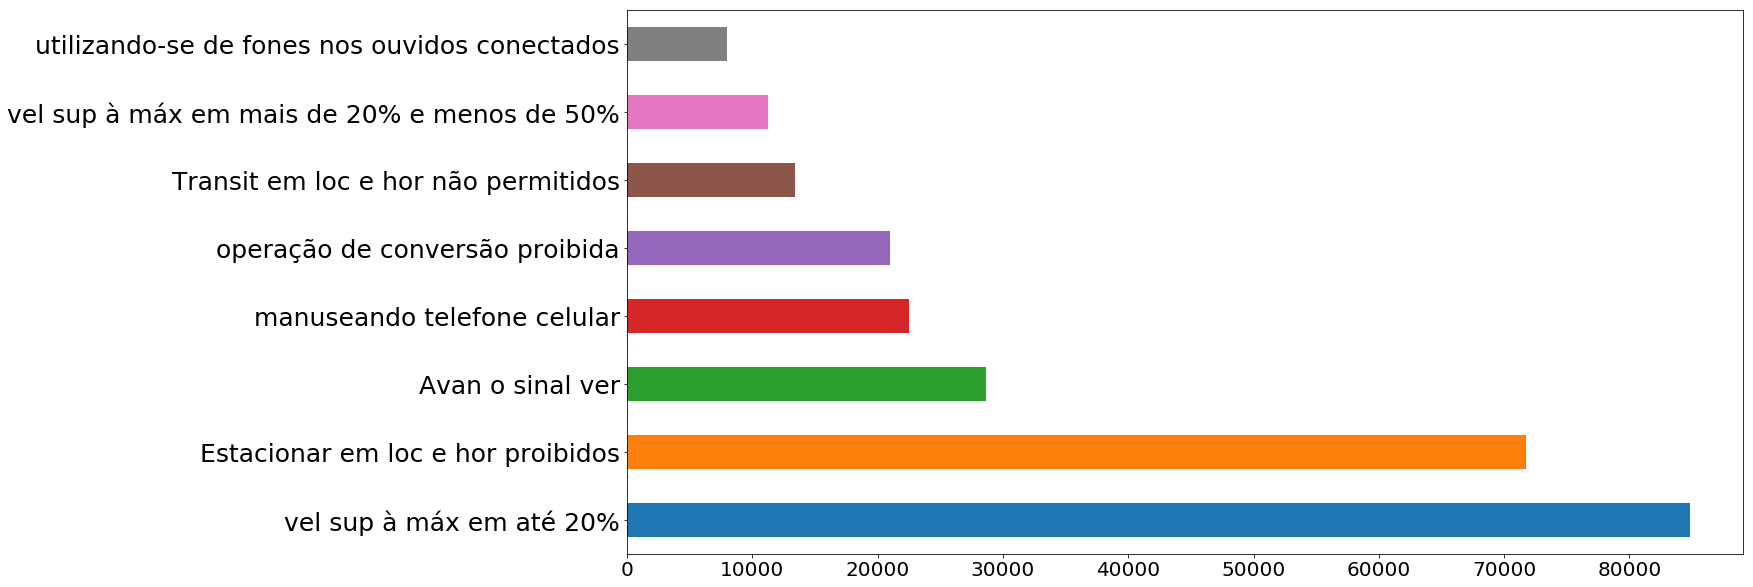

In [197]:
multas.plot(kind='barh')

In [199]:
ds.head(1)

,datainfracao,horainfracao,dataimplantacao,agenteequipamento,infracao,descricaoinfracao,amparolegal,localcometimento,multa
1,2017-01-01,07:38:21,2017-01-25,Código 3 - LOMBADA ELETRÔNICA,7455,Transitar em velocidade superior à máxima perm...,"Art. 218, Inc. I","AV. MARECHAL MASCARENHAS DE MORAES - SEMAFORO,...",vel sup à máx em até 20%


In [208]:
 agruparEquipamentosxMultas =ds.groupby(['agenteequipamento'])['multa'].value_counts()

In [209]:
#multas aplicadas por cada equipamento
agruparEquipamentosxMultas

agenteequipamento                      multa                                        
Código 3 - LOMBADA ELETRÔNICA          vel sup à máx em até 20%                         84814
                                       vel sup à máx em mais de 20% e menos de 50%      11232
Código 5 - FOTOSENSOR                  Avan o sinal ver                                 19123
                                       operação de conversão proibida                    9912
                                       Transit em loc e hor não permitidos               7998
Código 7 - ZONA AZUL TALÃO ELETRÔNICO  Estacionar em loc e hor proibidos                25153
Código 8 - AUTOS NO TALÃO ELETRÔNICO   Estacionar em loc e hor proibidos                46585
                                       manuseando telefone celular                      22514
                                       operação de conversão proibida                   11087
                                       Avan o sinal ver              

In [184]:
ds.groupby(['agenteequipamento'])['multa'].value_counts()

agenteequipamento                      multa                                        
Código 3 - LOMBADA ELETRÔNICA          vel sup à máx em até 20%                         84814
                                       vel sup à máx em mais de 20% e menos de 50%      11232
                                       transitar velocidade 50% maior que a via           691
Código 5 - FOTOSENSOR                  Avan o sinal ver                                 19123
                                       operação de conversão proibida                    9912
                                       Transit em loc e hor não permitidos               7998
                                       parar na faxa de pedestre                           45
Código 7 - ZONA AZUL TALÃO ELETRÔNICO  Estacionar em loc e hor proibidos                25153
                                       indefinido                                          47
Código 8 - AUTOS NO TALÃO ELETRÔNICO   Estacionar em loc e hor proibi

In [21]:
ds['datainfracao'] = pd.to_datetime(ds['datainfracao'], format="%Y-%m-%d")

In [20]:
ds['horainfracao'] = pd.to_datetime(ds['horainfracao'], format="%H:%M:%S")

In [23]:
ds

,datainfracao,horainfracao,dataimplantacao,agenteequipamento,infracao,descricaoinfracao,amparolegal,localcometimento,multa,valor_multa
0,2017-01-01,20:12:24,2017-01-05,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5452,Estacionar o veículo no passeio.,"Art. 181, Inc. VIII","AVENIDA CONSELHEIRO AGUIAR, AO LADO BOMPRECO",indefinido,0.00
1,2017-01-01,07:38:21,2017-01-25,Código 3 - LOMBADA ELETRÔNICA,7455,Transitar em velocidade superior à máxima perm...,"Art. 218, Inc. I","AV. MARECHAL MASCARENHAS DE MORAES - SEMAFORO,...",vel sup à máx em até 20%,130.16
2,2017-01-01,11:15:50,2017-01-25,Código 3 - LOMBADA ELETRÔNICA,7463,Transitar em velocidade superior à máxima perm...,"Art. 218, Inc. II","AV. RECIFE, SEMAFORO 336",vel sup à máx em mais de 20% e menos de 50%,195.23
3,2017-01-01,11:20:34,2017-01-25,Código 3 - LOMBADA ELETRÔNICA,7455,Transitar em velocidade superior à máxima perm...,"Art. 218, Inc. I","AV. GOV. AGAMENON MAGALHAES, SEMAFORO 173.",vel sup à máx em até 20%,130.16
4,2017-01-01,12:40:59,2017-01-25,Código 3 - LOMBADA ELETRÔNICA,7463,Transitar em velocidade superior à máxima perm...,"Art. 218, Inc. II","RUA MADRE DE DEUS, SEMAFORO 020.",vel sup à máx em mais de 20% e menos de 50%,195.23
5,2017-01-01,13:03:06,2017-01-25,Código 3 - LOMBADA ELETRÔNICA,7463,Transitar em velocidade superior à máxima perm...,"Art. 218, Inc. II","AV. RECIFE, SEMAFORO 336",vel sup à máx em mais de 20% e menos de 50%,195.23
6,2017-01-01,14:25:32,2017-01-25,Código 3 - LOMBADA ELETRÔNICA,7455,Transitar em velocidade superior à máxima perm...,"Art. 218, Inc. I","AV. MARECHAL MASCARENHAS DE MORAES - SEMAFORO,...",vel sup à máx em até 20%,130.16
7,2017-01-01,06:32:38,2017-01-25,Código 3 - LOMBADA ELETRÔNICA,7455,Transitar em velocidade superior à máxima perm...,"Art. 218, Inc. I","RUA REAL DA TORRE, SEMAFORO 237.",vel sup à máx em até 20%,130.16
8,2017-01-01,16:09:12,2017-01-25,Código 3 - LOMBADA ELETRÔNICA,7455,Transitar em velocidade superior à máxima perm...,"Art. 218, Inc. I","RUA REAL DA TORRE, SEMAFORO 237.",vel sup à máx em até 20%,130.16
9,2017-01-01,16:10:07,2017-01-25,Código 3 - LOMBADA ELETRÔNICA,7455,Transitar em velocidade superior à máxima perm...,"Art. 218, Inc. I","AV. GOV. AGAMENON MAGALHAES, SEMAFORO 173.",vel sup à máx em até 20%,130.16


In [28]:
 agruparEquipamentosxMultas =ds.groupby(['agenteequipamento'])['valor_multa'].sum()

In [26]:
agruparEquipamentosxMultas

agenteequipamento
Código 3 - LOMBADA ELETRÔNICA            1.323221e+07
Código 5 - FOTOSENSOR                    8.594023e+06
Código 7 - ZONA AZUL TALÃO ELETRÔNICO    4.910620e+06
Código 8 - AUTOS NO TALÃO ELETRÔNICO     2.657737e+07
Código 9 - FAIXA AZUL                    3.625348e+05
Name: valor_multa, dtype: float64

In [87]:
leixMultas =ds.groupby(['multa'])['valor_multa'].sum()

In [88]:
leixMultas.sort_values(ascending=False)

multa
vel sup à máx em até 20%                         1.103939e+07
Estacionar em loc e hor proibidos                1.097425e+07
Avan o sinal ver                                 8.401166e+06
manuseando telefone celular                      6.607184e+06
operação de conversão proibida                   4.099635e+06
transitar em calçadas ou ciclo                   2.257371e+06
vel sup à máx em mais de 20% e menos de 50%      2.192823e+06
Transit em loc e hor não permitidos              1.747008e+06
estacionar em local proibido                     1.242639e+06
utilizando-se de fones nos ouvidos conectados    1.037245e+06
dirigir sem atenção aos cuidados                 8.437841e+05
via exclusiva transp publico                     6.132688e+05
indefinido                                       3.549341e+05
estacionar em fila dupla                         3.168583e+05
estacionar em vaga de idoso e def                3.129764e+05
conduzir sem capacete                            3.077976e+05
co

In [89]:
ds.dtypes

datainfracao          object
horainfracao          object
dataimplantacao       object
agenteequipamento     object
infracao               int64
descricaoinfracao     object
amparolegal           object
localcometimento      object
multa                 object
valor_multa          float64
dtype: object

In [35]:
de0as6= ds[(ds['horainfracao'] >= '00:00:00') & (ds['horainfracao'] <= "05:59:59")]
de6as12 = ds[(ds['horainfracao'] >= '06:00:00') & (ds['horainfracao'] <= "11:59:59")]
de12as18 = ds[(ds['horainfracao'] >= '12:00:00') & (ds['horainfracao'] <= "17:59:59")]
de18as24 = ds[(ds['horainfracao'] >= '18:00:00') & (ds['horainfracao'] <= "23:59:59")]

In [36]:
print(de0as6.shape)
print(de6as12.shape)
print(de12as18.shape)
print(de18as24.shape)


(2348, 10)
(134898, 10)
(143007, 10)
(55495, 10)


In [37]:
multasPorPeriodo =[]

In [38]:
multasPorPeriodo.append(len(de0as6))
multasPorPeriodo.append(len(de6as12))
multasPorPeriodo.append(len(de12as18))
multasPorPeriodo.append(len(de18as24))



In [39]:
for i in multasPorPeriodo:
    print(i)

2348
134898
143007
55495


In [67]:
data = {
'da 0 as 6': [2348],
'de 6 as 12': [134989],
'de 12 as 18': [143007],
'de 18 as 24': [55495]
}

In [68]:
data

{'da 0 as 6': [2348],
 'de 12 as 18': [143007],
 'de 18 as 24': [55495],
 'de 6 as 12': [134989]}

In [56]:
total = {"de 0 as 6hs": 2348, "de 6 as 12hs": 134898, "de 12hs as 18hs": 143007,"de 18 as 24hs" : 55495}

totloop = [i for i in total.keys()]

loop = [j for j in total.values()]

totalPos = np.arange(len(totloop))

azul = "blue"

verde = "green"

preto = "black"

In [57]:
def plota_barra_h_1():    
    plt.barh(totalPos, loop, align='center', )                 
    plt.yticks(totalPos, totloop)   
    plt.xlabel('multas')    
    plt.title('horario de multas jan a jun de 2017')
    
    plt.show()

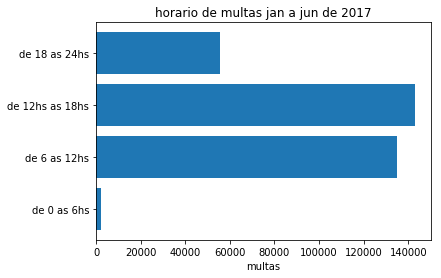

In [58]:
plota_barra_h_1()

In [71]:
ds

,datainfracao,horainfracao,dataimplantacao,agenteequipamento,infracao,descricaoinfracao,amparolegal,localcometimento,multa,valor_multa
0,2017-01-01,20:12:24,2017-01-05,Código 8 - AUTOS NO TALÃO ELETRÔNICO,5452,Estacionar o veículo no passeio.,"Art. 181, Inc. VIII","AVENIDA CONSELHEIRO AGUIAR, AO LADO BOMPRECO",indefinido,0.00
1,2017-01-01,07:38:21,2017-01-25,Código 3 - LOMBADA ELETRÔNICA,7455,Transitar em velocidade superior à máxima perm...,"Art. 218, Inc. I","AV. MARECHAL MASCARENHAS DE MORAES - SEMAFORO,...",vel sup à máx em até 20%,130.16
2,2017-01-01,11:15:50,2017-01-25,Código 3 - LOMBADA ELETRÔNICA,7463,Transitar em velocidade superior à máxima perm...,"Art. 218, Inc. II","AV. RECIFE, SEMAFORO 336",vel sup à máx em mais de 20% e menos de 50%,195.23
3,2017-01-01,11:20:34,2017-01-25,Código 3 - LOMBADA ELETRÔNICA,7455,Transitar em velocidade superior à máxima perm...,"Art. 218, Inc. I","AV. GOV. AGAMENON MAGALHAES, SEMAFORO 173.",vel sup à máx em até 20%,130.16
4,2017-01-01,12:40:59,2017-01-25,Código 3 - LOMBADA ELETRÔNICA,7463,Transitar em velocidade superior à máxima perm...,"Art. 218, Inc. II","RUA MADRE DE DEUS, SEMAFORO 020.",vel sup à máx em mais de 20% e menos de 50%,195.23
5,2017-01-01,13:03:06,2017-01-25,Código 3 - LOMBADA ELETRÔNICA,7463,Transitar em velocidade superior à máxima perm...,"Art. 218, Inc. II","AV. RECIFE, SEMAFORO 336",vel sup à máx em mais de 20% e menos de 50%,195.23
6,2017-01-01,14:25:32,2017-01-25,Código 3 - LOMBADA ELETRÔNICA,7455,Transitar em velocidade superior à máxima perm...,"Art. 218, Inc. I","AV. MARECHAL MASCARENHAS DE MORAES - SEMAFORO,...",vel sup à máx em até 20%,130.16
7,2017-01-01,06:32:38,2017-01-25,Código 3 - LOMBADA ELETRÔNICA,7455,Transitar em velocidade superior à máxima perm...,"Art. 218, Inc. I","RUA REAL DA TORRE, SEMAFORO 237.",vel sup à máx em até 20%,130.16
8,2017-01-01,16:09:12,2017-01-25,Código 3 - LOMBADA ELETRÔNICA,7455,Transitar em velocidade superior à máxima perm...,"Art. 218, Inc. I","RUA REAL DA TORRE, SEMAFORO 237.",vel sup à máx em até 20%,130.16
9,2017-01-01,16:10:07,2017-01-25,Código 3 - LOMBADA ELETRÔNICA,7455,Transitar em velocidade superior à máxima perm...,"Art. 218, Inc. I","AV. GOV. AGAMENON MAGALHAES, SEMAFORO 173.",vel sup à máx em até 20%,130.16


In [167]:
jan = ds[(ds['datainfracao'] > '2017-01-01') & (ds['datainfracao'] < "2017-01-31")]
fev = ds[(ds['datainfracao'] > '2017-02-01') & (ds['datainfracao'] < "2017-02-28")]
mar = ds[(ds['datainfracao'] > '2017-03-01') & (ds['datainfracao'] < "2017-03-31")]
abr = ds[(ds['datainfracao'] > '2017-04-01') & (ds['datainfracao'] < "2017-04-30")]
mai = ds[(ds['datainfracao'] > '2017-05-01') & (ds['datainfracao'] < "2017-05-31")]
jun = ds[(ds['datainfracao'] > '2017-06-01') & (ds['datainfracao'] < "2017-06-30")]



In [168]:
print(jan.shape)
print(fev.shape)
print(mar.shape)
print(abr.shape)
print(mai.shape)
print(jun.shape)

(44170, 10)
(37549, 10)
(37522, 10)
(44314, 10)
(47476, 10)
(46263, 10)


In [169]:
qtdMultaMes = []


In [170]:
qtdMultaMes.append(len(jan))
qtdMultaMes.append(len(fev))
qtdMultaMes.append(len(mar))
qtdMultaMes.append(len(abr))
qtdMultaMes.append(len(mai))
qtdMultaMes.append(len(jun))

In [172]:
qtdMultaMes

[44170, 37549, 37522, 44314, 47476, 46263]

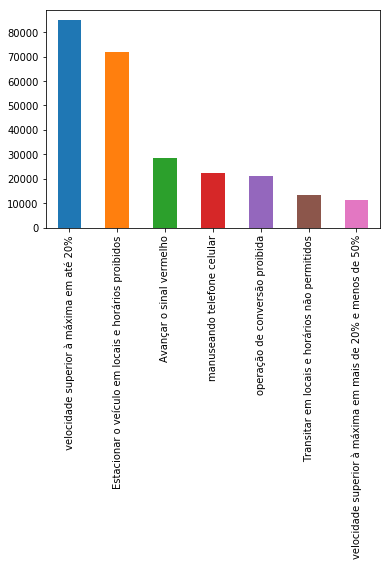

In [74]:
multas.plot(kind='bar')

